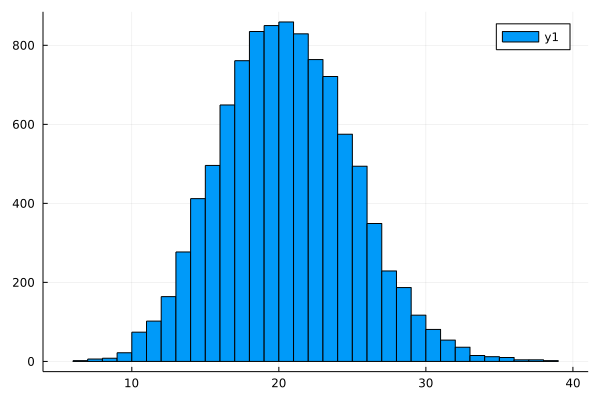

In [42]:
using StatsBase
using Distributions
using Plots
function poisson_inverse_trans(lambda)
    U = rand(Uniform(0, 1))
    i = 0
    p = ℯ^(-lambda)
    A = p
    while 1<2
        if U < A
            X = i
            return X
            break
        
        else
            p = lambda*p/(i+1)
            A = A + p
            i = i + 1
        end
    end
end
A = Array{Int64}(undef, 10000)
for i in 1:10000
        A[i] = poisson_inverse_trans(20)
    end
h = histogram(A)
display(h)   

In [43]:
m = genmean(A, 1)
println(m)
v = var(A, mean=m)
println(v)

20.0349
20.05508749874987


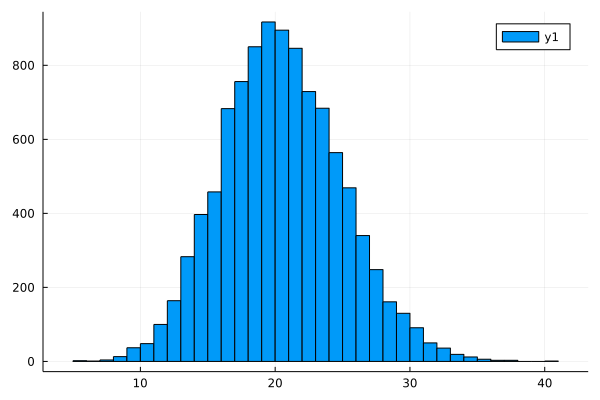

In [44]:
B = rand(Poisson(20), 10000)
h = histogram(B)
display(h)

In [45]:
c = genmean(B, 1)
println(c)

20.0086


In [78]:
function draw_binom(n, p, lambda)
    all_c = []
    accept = false
    r = x -> (binomial(n,x)*(1-p)^(n-x)*p^x*ℯ^(-lambda)/(lambda)^x)
    for x in 0:n
        push!(all_c, r(x))
    end
    c = maximum(all_c) + 0.01
        
    while .!accept 
        U = rand(Uniform(0,1))
        prop = rand(Poisson(lambda))
        if U < all_c[prop]/c
            accept = true
            return prop
        end
    end
end

Y = []
for i in 1:5000
    push!(Y, draw_binom(10, 0.25, 5))
end

draw_binom (generic function with 1 method)